In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('./train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [47]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [48]:
percent_missing = df.isnull().sum() * 100 / len(df)
columns = df.columns
pd.DataFrame({'Missing %':percent_missing}).sort_values(by='Missing %', ascending=False).head(10)

,Missing %
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945


In [49]:
df.drop(['Id','PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [50]:
numbers = ['int64','float64']
numerical_features = [i for i in df.columns if df[i].dtype in numbers]
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

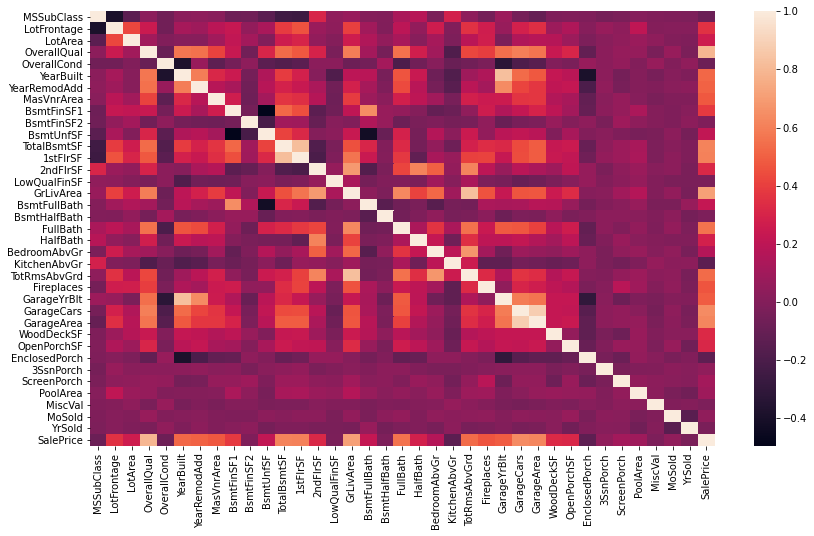

In [51]:
plt.figure(figsize=(14,8))
sns.heatmap(df[numerical_features].corr())
plt.show()

In [52]:
correlation = pd.DataFrame(df[numerical_features].corr()['SalePrice'].sort_values(ascending=False))
correlation

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


### will consider attributes with more than .45 correlation

In [53]:
numerical_variables_considered = correlation['SalePrice'][:14]
numerical_variables_considered

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64

In [54]:
df[numerical_variables_considered.index].head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces
0,208500,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1
2,223500,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1
3,140000,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1


In [55]:
df[numerical_variables_considered.index].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.486362,0.477493,0.466929
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684,0.547766,0.411876,0.396765
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389,0.231197,0.390857,0.461679
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622,0.588920,0.364204,0.300789
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600,0.564567,0.373066,0.269141
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066,0.322445,0.363936,0.339519
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379,0.233449,0.344501,0.410531
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046,0.484557,0.276833,0.243671
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740,0.148112,0.280682,0.326114
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855,0.825667,0.315707,0.147716


1. garageyrbuilt and yearbuilt
2. TotRmsAbvGrd and GrLivArea
3. 1stFlrSF and TotalBsmtSF
4. GarageCars and GarageArea

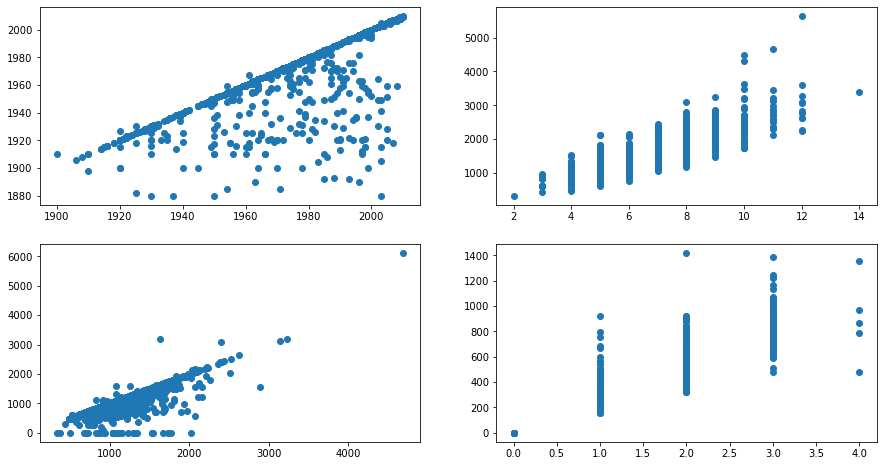

In [57]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(df['GarageYrBlt'], df['YearBuilt'])
plt.subplot(2,2,2)
plt.scatter(df['TotRmsAbvGrd'], df['GrLivArea'])
plt.subplot(2,2,3)
plt.scatter(df['1stFlrSF'], df['TotalBsmtSF'])
plt.subplot(2,2,4)
plt.scatter(df['GarageCars'], df['GarageArea'])
plt.show()

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

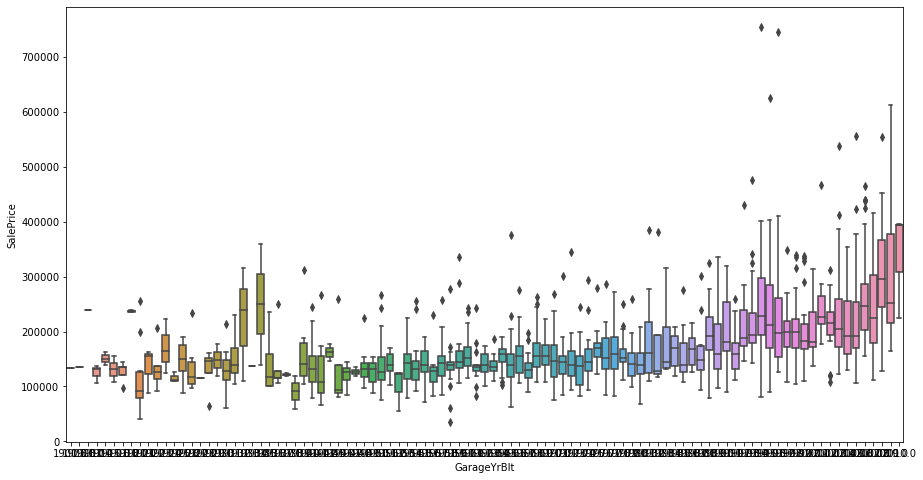

In [58]:
plt.figure(figsize=(15,8))
sns.boxplot(x='GarageYrBlt', y='SalePrice', data=df)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

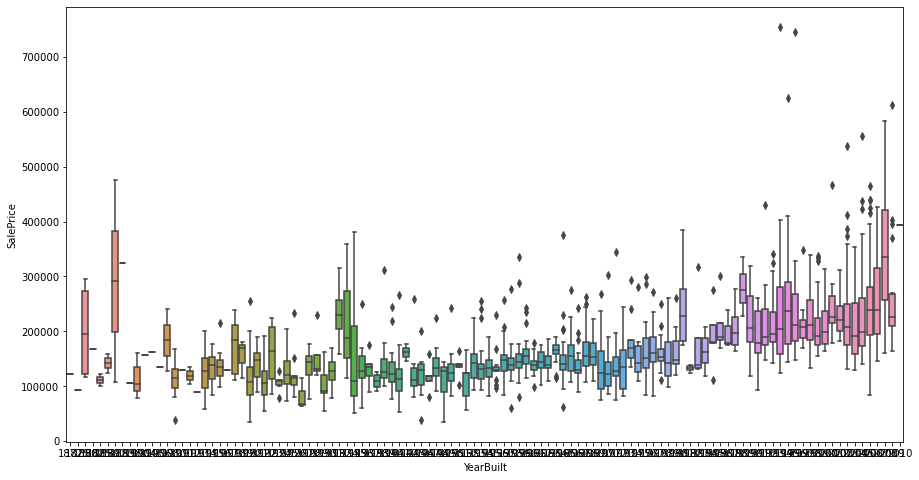

In [59]:
plt.figure(figsize=(15,8))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df)

In [60]:
bin_labels_5 = ['very_old','old','mid','new','very_new']
df['year_binned'] = pd.qcut(df['YearBuilt'],
                              q=5,
                              labels=bin_labels_5)
df['year_binned'].head()

0         new
1         mid
2         new
3    very_old
4         new
Name: year_binned, dtype: category
Categories (5, object): ['very_old' < 'old' < 'mid' < 'new' < 'very_new']

In [61]:
df.drop(['YearBuilt','GarageYrBlt','GrLivArea','TotalBsmtSF','GarageArea'], axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_binned
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,new
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,mid
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,new
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,very_old
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,new


In [65]:
numbers = ['int64','float64']
numerical_features = [i for i in df.columns if df[i].dtype in numbers]
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [66]:
df[numerical_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [69]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GarageCars       0.640409
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearRemodAdd     0.507101
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [70]:
n_considered = ['OverallQual','GarageCars','1stFlrSF','FullBath','TotRmsAbvGrd','MasVnrArea','Fireplaces']
numerical_data = df[n_considered]
numerical_data.head()

,OverallQual,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,MasVnrArea,Fireplaces
0,7,2,856,2,8,196.0,0
1,6,2,1262,2,6,0.0,1
2,7,2,920,2,6,162.0,1
3,7,3,961,1,7,0.0,1
4,8,3,1145,2,9,350.0,1


In [71]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GarageCars    1460 non-null   int64  
 2   1stFlrSF      1460 non-null   int64  
 3   FullBath      1460 non-null   int64  
 4   TotRmsAbvGrd  1460 non-null   int64  
 5   MasVnrArea    1452 non-null   float64
 6   Fireplaces    1460 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 80.0 KB


In [72]:
numerical_data['MasVnrArea'] = numerical_data['MasVnrArea'].fillna(numerical_data['MasVnrArea'].mean())
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GarageCars    1460 non-null   int64  
 2   1stFlrSF      1460 non-null   int64  
 3   FullBath      1460 non-null   int64  
 4   TotRmsAbvGrd  1460 non-null   int64  
 5   MasVnrArea    1460 non-null   float64
 6   Fireplaces    1460 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 80.0 KB


In [73]:
categorical_features = [i for i in df.columns if i not in numerical_features]
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'year_binned']

ValueError: num must be 1 <= num <= 39, not 40

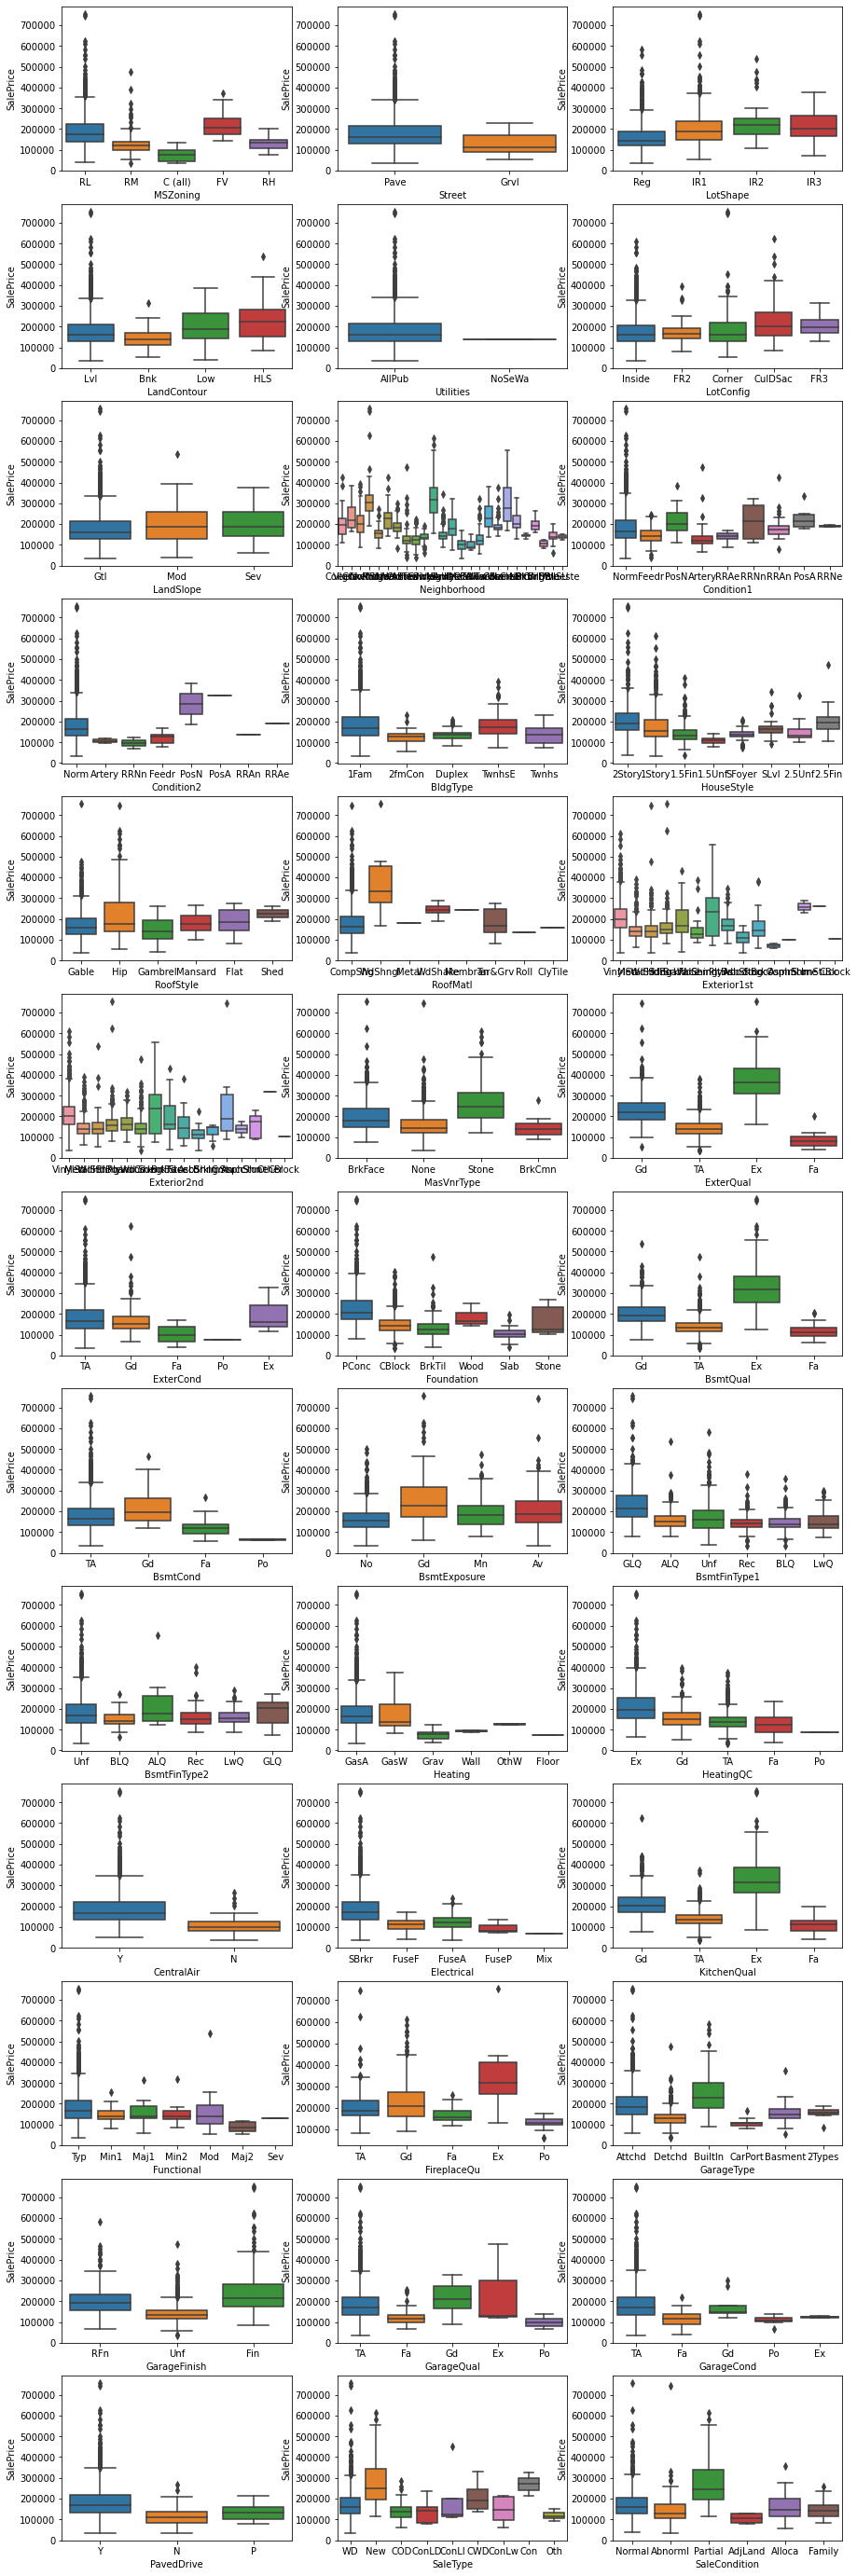

In [76]:
fig, axs = plt.subplots(13, 3, figsize = (15, 50))
for ids, col in enumerate(categorical_features):
    plt.subplot(10, 4, ids+1)
    sns.boxplot(x=col, y='SalePrice', data=df)

<AxesSubplot:xlabel='year_binned', ylabel='SalePrice'>

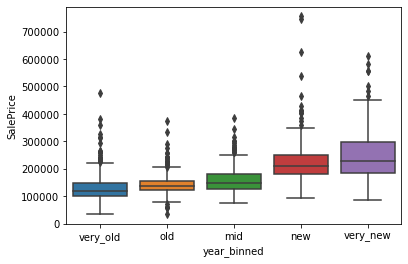

In [77]:
sns.boxplot(x='year_binned', y='SalePrice', data=df)

In [79]:
categorical_features_considered = ['Neighborhood','Utilities','ExterQual','SaleType','SaleCondition','year_binned','GarageQual']

In [81]:
df['GarageQual'].fillna(method = 'bfill', inplace=True)
df[categorical_features_considered].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Neighborhood   1460 non-null   object  
 1   Utilities      1460 non-null   object  
 2   ExterQual      1460 non-null   object  
 3   SaleType       1460 non-null   object  
 4   SaleCondition  1460 non-null   object  
 5   year_binned    1460 non-null   category
 6   GarageQual     1460 non-null   object  
dtypes: category(1), object(6)
memory usage: 70.2+ KB


In [82]:
categorical = pd.get_dummies(df[categorical_features_considered], prefix_sep='_', drop_first=True)
categorical.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,SaleCondition_Normal,SaleCondition_Partial,year_binned_old,year_binned_mid,year_binned_new,year_binned_very_new,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [83]:
numerical_data.head()

,OverallQual,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,MasVnrArea,Fireplaces
0,7,2,856,2,8,196.0,0
1,6,2,1262,2,6,0.0,1
2,7,2,920,2,6,162.0,1
3,7,3,961,1,7,0.0,1
4,8,3,1145,2,9,350.0,1


In [84]:
final_data = pd.concat([numerical_data, categorical], axis=1)
final_data.head()

,OverallQual,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,MasVnrArea,Fireplaces,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,SaleCondition_Normal,SaleCondition_Partial,year_binned_old,year_binned_mid,year_binned_new,year_binned_very_new,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,7,2,856,2,8,196.0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,6,2,1262,2,6,0.0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,7,2,920,2,6,162.0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,7,3,961,1,7,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8,3,1145,2,9,350.0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [86]:
x_train, x_test, y_train, y_test = train_test_split(final_data,df['SalePrice'], test_size=0.3, random_state = 42)
x_train.shape

(1022, 56)

In [88]:
LR = LinearRegression()
LR.fit(x_train, y_train)
print(LR.score(x_test, y_test))

0.8129967168829197


In [89]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.8734767383191266

In [91]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(x_train, y_train)
rr.score(x_test, y_test)

0.8191442017891095

In [92]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(x_train, y_train)
en.score(x_test, y_test)

0.7875227524969516

In [94]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(), final_data, df['SalePrice'], cv=10)
print(scores.mean())

0.8279344877445904


In [95]:
import xgboost as xg
xgb = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb.fit(x_train, y_train)
xgb.score(x_test, y_test)

[02:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


0.8590995814863146

In [97]:
predicted1 = rfr.predict(x_test)
predicted2 = xgb.predict(x_test)
predicted = pd.DataFrame({'predicted1':predicted1, 'predicted2':predicted2})
predicted['predicted_final'] = (predicted['predicted1']+predicted['predicted2'])/2
predicted.head()

,predicted1,predicted2,predicted_final
0,135294.25,130776.679688,133035.464844
1,286106.86,276357.093750,281231.976875
2,127003.60,128795.070312,127899.335156
3,188290.50,188496.109375,188393.304688
4,302486.32,283808.218750,293147.269375


In [101]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
331     139000
323     126175
650     205950
439     110000
798     485000
Name: SalePrice, Length: 438, dtype: int64

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print(r2_score(y_test, predicted['predicted_final']))

0.8723189376379078
